## 1/27 2020, Data Science Nights introductory sessions
# Tabular datasets and plotting
#### What we will try to cover?
  * How to load and explore datasets in tabular format
  * How to ask questions about the dataset
  * How to look for answers and plot them

#### In addition, as comments
  * Working environment
  * Coding conventions

_Errare humanum est_

_Million ways to do the same_

In [1]:
import glob
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn.cluster
import numpy as np

In [2]:
matplotlib.rcParams['figure.figsize'] = (12, 8)

## Chapter 1. Loading & exploring data

**TODO: switch to github urls**

In [40]:
countries = pd.read_csv("https://github.com/mxposed/dsn-intro/raw/master/data/countries.csv")
gini = pd.read_csv("https://github.com/mxposed/dsn-intro/raw/master/data/gini.csv").set_index("country")

In [41]:
countries.head()

,Unnamed: 0,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017"
0,0,afg,Afghanistan,asia,asia_west,south_asia,g77,33,66,19/11/1946,South Asia,Low income,NaN
1,1,alb,Albania,europe,europe_east,europe_central_asia,others,41,20,14/12/1955,Europe & Central Asia,Upper middle income,NaN
2,2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28,3,8/10/1962,Middle East & North Africa,Upper middle income,NaN
3,3,and,Andorra,europe,europe_west,europe_central_asia,others,"42,50779","1,52109",28/7/1993,Europe & Central Asia,High income,NaN
4,4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,"-12,5","18,5",1/12/1976,Sub-Saharan Africa,Lower middle income,NaN


In [33]:
countries.groupby("eight_regions").groups

{'africa_north': Int64Index([2, 47, 51, 99, 119, 178], dtype='int64'),
 'africa_sub_saharan': Int64Index([  4,  18,  22,  26,  27,  29,  31,  32,  33,  37,  38,  39,  41,
              53,  54,  56,  60,  61,  64,  68,  69,  88,  97,  98, 104, 105,
             108, 111, 112, 120, 122, 128, 129, 144, 150, 152, 154, 155, 160,
             161, 164, 166, 172, 175, 182, 194, 195, 196],
            dtype='int64'),
 'america_north': Int64Index([  5,  11,  14,  17,  30,  40,  43,  48,  49,  52,  66,  67,  71,
              73,  84, 113, 127, 134, 145, 146, 147, 177, 186],
            dtype='int64'),
 'america_south': Int64Index([6, 20, 23, 34, 36, 50, 70, 136, 137, 165, 187, 190], dtype='int64'),
 'asia_west': Int64Index([  0,  12,  13,  19,  77,  79,  80,  82,  86,  87,  92,  93,  96,
             107, 124, 131, 132, 141, 151, 163, 169, 171, 180, 184, 188, 191,
             193],
            dtype='int64'),
 'east_asia_pacific': Int64Index([  8,  24,  28,  35,  57,  74,  78,  85,  89,  90, 

In [34]:
gini.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
Algeria,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,...,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6
Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,...,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6


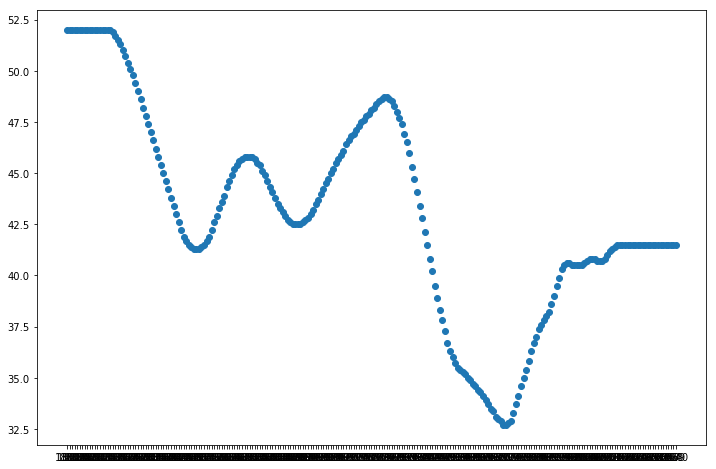

In [16]:
plt.scatter(gini.columns, gini.loc["United States", :])

In [35]:
gini.min()

1800    16.3
1801    16.3
1802    16.3
1803    16.3
1804    16.3
1805    16.3
1806    16.3
1807    16.3
1808    16.3
1809    16.3
1810    16.3
1811    16.3
1812    16.3
1813    16.3
1814    16.3
1815    16.3
1816    16.3
1817    16.3
1818    16.3
1819    16.3
1820    16.3
1821    16.3
1822    16.3
1823    16.3
1824    16.3
1825    16.3
1826    16.3
1827    16.3
1828    16.3
1829    16.3
        ... 
2011    24.8
2012    24.5
2013    24.7
2014    24.8
2015    24.8
2016    24.9
2017    25.1
2018    25.0
2019    25.0
2020    25.0
2021    25.0
2022    25.0
2023    25.0
2024    25.0
2025    25.0
2026    25.0
2027    25.0
2028    25.0
2029    25.0
2030    25.0
2031    25.0
2032    25.0
2033    25.0
2034    25.0
2035    25.0
2036    25.0
2037    25.0
2038    25.0
2039    25.0
2040    25.0
Length: 241, dtype: float64

In [10]:
gini.min().min()

16.0

In [11]:
gini.min().idxmin()

'1974'

In [12]:
gini.T.min().idxmin()

'Romania'

In [13]:
gini.max().max()

79.9

In [14]:
gini.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Columns: 241 entries, 1800 to 2040
dtypes: float64(241)
memory usage: 368.7+ KB


In [15]:
gini.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,...,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769
std,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,...,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433
min,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
25%,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000
50%,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000
75%,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,...,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000
max,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000


(29.535, 57.365)

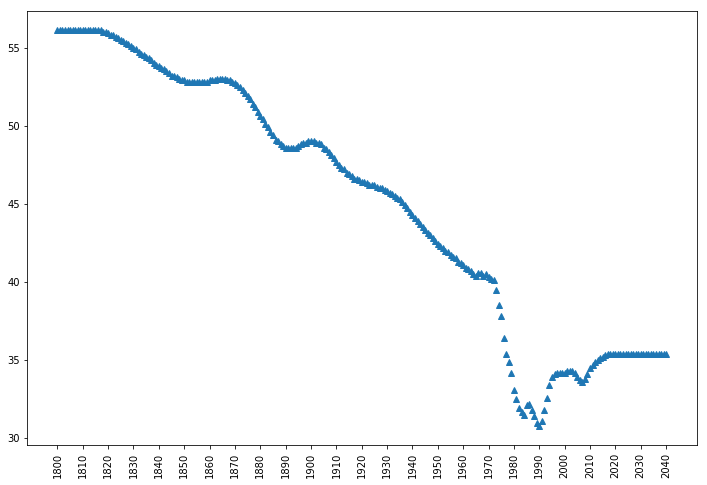

In [17]:
plt.plot(gini.columns, gini.loc["Italy", :], '^', lw=5)
plt.xticks(gini.columns[::10], rotation="vertical");
plt.ylim()
#plt.ylim(0, gini.loc["Japan", :].max() + 5)

(0, 56.61871347515447)

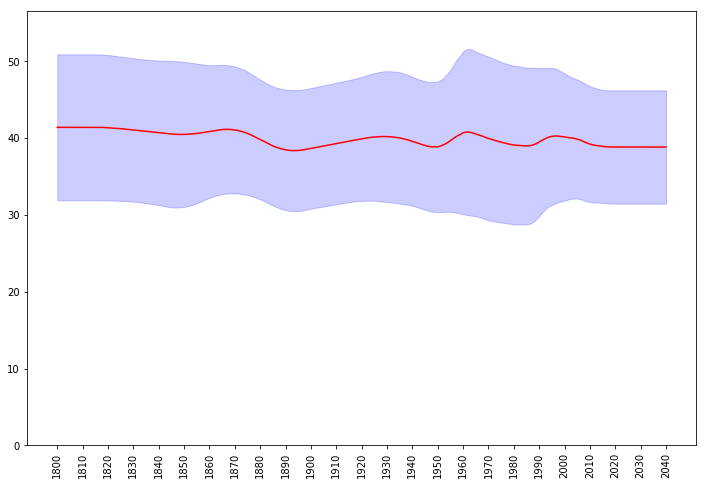

In [18]:
mean = gini.mean()
plt.plot(gini.columns, mean, 'r')
plt.xticks(gini.columns[::10], rotation=90)
sd = gini.std()
plt.fill_between(gini.columns, mean - sd, mean + sd, color = "blue", alpha = 0.2)
plt.ylim(0, (mean + sd).max() + 5)

<BarContainer object of 195 artists>

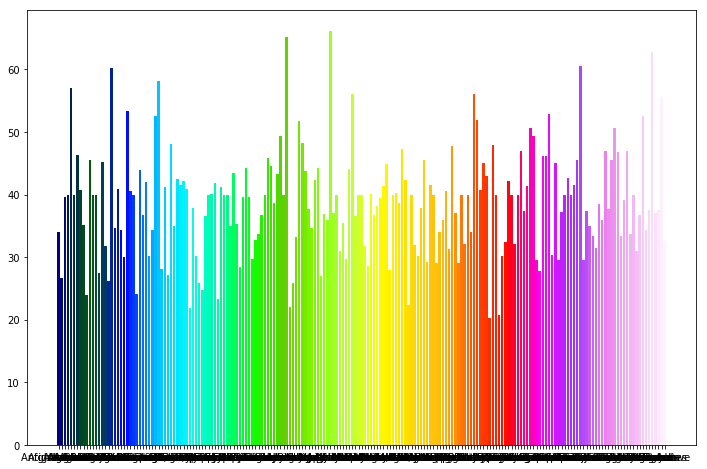

In [19]:
cmap = plt.get_cmap('gist_ncar')
colors = cmap(np.linspace(0, 1, len(gini.index)+1))
plt.bar(gini.index, gini.loc[:, "1950"], color=colors)

(array([ 5.,  4.,  5., 10., 15., 13., 17., 21., 38., 18., 12., 14.,  5.,
         4.,  4.,  3.,  2.,  2.,  1.,  2.]),
 array([20.2, 22.5, 24.8, 27.1, 29.4, 31.7, 34. , 36.3, 38.6, 40.9, 43.2,
        45.5, 47.8, 50.1, 52.4, 54.7, 57. , 59.3, 61.6, 63.9, 66.2]),
 <a list of 20 Patch objects>)

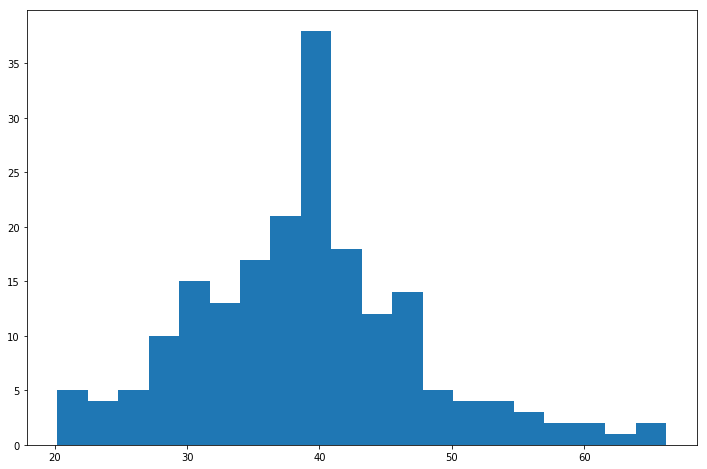

In [20]:
plt.hist(gini.loc[:, "1950"], bins = 20)

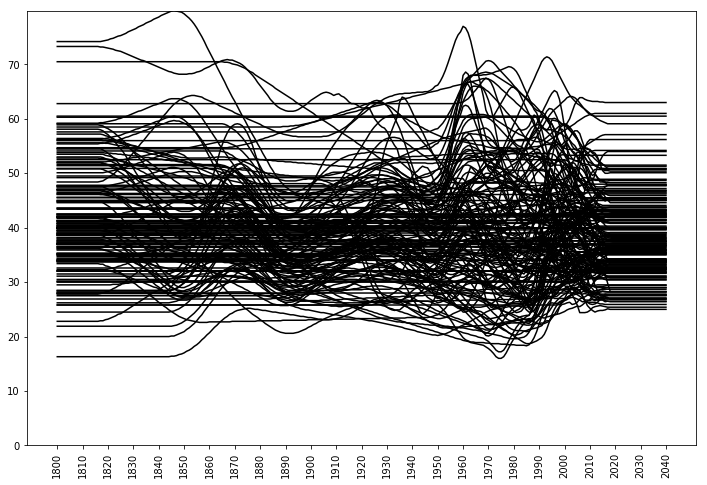

In [21]:
for row in range(gini.shape[0]):
    plt.plot(gini.columns, gini.iloc[row,], c="black")
plt.ylim(0, gini.max().max())
plt.xticks(gini.columns[::10], rotation="vertical");

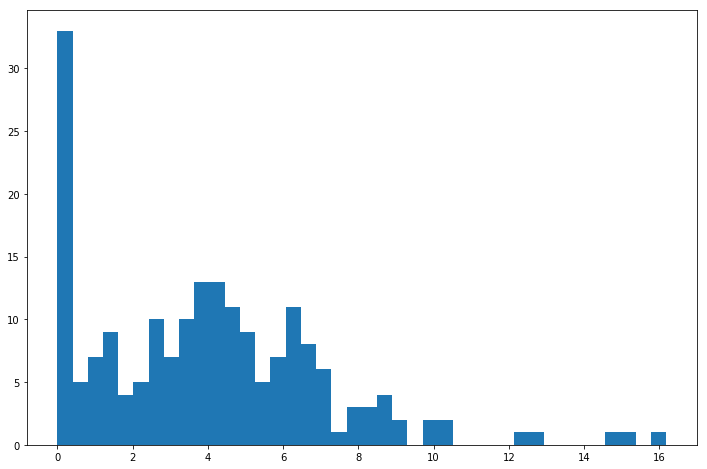

In [22]:
plt.hist(gini.std(axis=1), bins=40);

In [23]:
gini.index[gini.std(axis=1) < 0.5]

Index(['Andorra', 'Antigua and Barbuda', 'Bahrain', 'Brunei', 'Cambodia',
       'Dominica', 'Equatorial Guinea', 'Eritrea', 'Grenada', 'Holy See',
       'Kiribati', 'Kuwait', 'Libya', 'Liechtenstein', 'Malta',
       'Marshall Islands', 'Monaco', 'Mongolia', 'Nauru', 'North Korea',
       'Oman', 'Palau', 'Palestine', 'Qatar', 'Samoa', 'San Marino',
       'Sao Tome and Principe', 'Saudi Arabia', 'South Sudan',
       'St. Kitts and Nevis', 'St. Lucia', 'St. Vincent and the Grenadines',
       'Tonga', 'Tuvalu', 'United Arab Emirates', 'Vanuatu'],
      dtype='object', name='country')

In [24]:
our_gini = gini.loc[gini.std(axis=1) > 1, "1900":"2015"]

In [25]:
our_gini.shape

(154, 116)

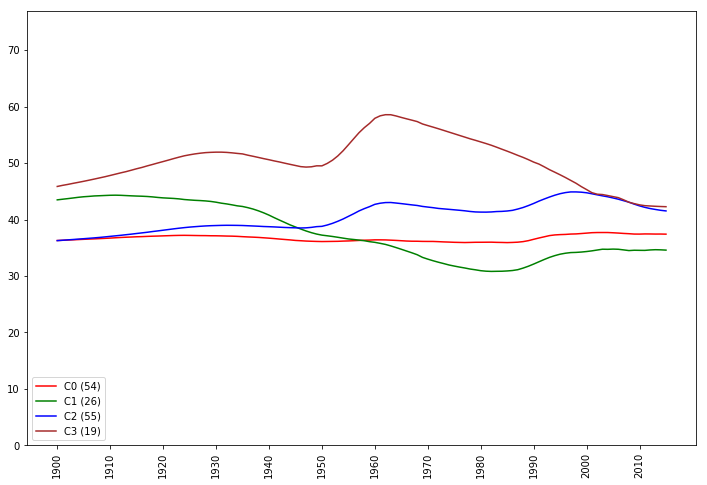

In [26]:
kmeans = sklearn.cluster.KMeans(n_clusters=4, n_init=100)
labels = kmeans.fit_predict(our_gini.subtract(our_gini.min(axis=1), axis="rows"))
colors = {
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'brown'
}
for cl in np.unique(labels):
    m = our_gini.iloc[labels == cl, ].mean()
    sd = our_gini.iloc[labels == cl, ].std()
    plt.plot(
        our_gini.columns, 
        m, 
        c=colors[cl], 
        label="C{} ({})".format(cl, (labels == cl).sum())
    )
#     plt.fill_between(
#         our_gini.columns,
#         m - sd,
#         m + sd,
#         color=colors[cl],
#         alpha=0.2
#     )
plt.ylim(0, our_gini.max().max())
plt.xticks(our_gini.columns[::10], rotation="vertical")
plt.legend(loc="lower left")

In [27]:
our_gini.index[labels == 3]

Index(['Algeria', 'Angola', 'Armenia', 'Brazil', 'Central African Republic',
       'Chile', 'Estonia', 'Ethiopia', 'Gabon', 'Guinea', 'Honduras', 'Kenya',
       'Mali', 'Senegal', 'Sierra Leone', 'South Africa', 'Tunisia',
       'Venezuela', 'Zambia'],
      dtype='object', name='country')

In [28]:
labels[our_gini.index == "Japan"]

array([1], dtype=int32)

In [29]:
our_gini.merge(countries, left_on="country", right_on="name").set_index(our_gini.index)

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017"
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,39.4,39.7,39.9,40.2,40.5,40.8,41.0,41.2,41.3,41.5,...,asia,asia_west,south_asia,g77,33,66,19/11/1946,South Asia,Low income,NaN
Albania,26.5,26.5,26.4,26.4,26.4,26.3,26.3,26.3,26.3,26.3,...,europe,europe_east,europe_central_asia,others,41,20,14/12/1955,Europe & Central Asia,Upper middle income,NaN
Algeria,33.8,34.0,34.2,34.3,34.5,34.6,34.8,35.0,35.2,35.3,...,africa,africa_north,middle_east_north_africa,g77,28,3,8/10/1962,Middle East & North Africa,Upper middle income,NaN
Angola,40.5,41.2,41.9,42.6,43.3,44.0,44.7,45.4,46.1,46.8,...,africa,africa_sub_saharan,sub_saharan_africa,g77,"-12,5","18,5",1/12/1976,Sub-Saharan Africa,Lower middle income,NaN
Argentina,48.1,48.4,48.7,49.0,49.3,49.5,49.8,49.9,50.1,50.2,...,americas,america_south,america,g77,-34,-64,24/10/1945,Latin America & Caribbean,Upper middle income,NaN
Armenia,37.6,37.8,38.0,38.3,38.5,38.7,38.9,39.1,39.2,39.4,...,europe,europe_east,europe_central_asia,others,"40,25",45,2/3/1992,Europe & Central Asia,Lower middle income,NaN
Australia,37.5,37.5,37.6,37.7,37.7,37.8,37.8,37.8,37.8,37.8,...,asia,east_asia_pacific,east_asia_pacific,oecd,-25,135,1/11/1945,East Asia & Pacific,High income,NaN
Austria,23.1,23.1,23.1,23.1,23.1,23.1,23.1,23.1,23.2,23.2,...,europe,europe_west,europe_central_asia,oecd,"47,33333","13,33333",14/12/1955,Europe & Central Asia,High income,NaN
Azerbaijan,61.3,61.0,60.6,60.3,60.0,59.7,59.4,59.1,58.8,58.5,...,europe,europe_east,europe_central_asia,others,"40,5","47,5",2/3/1992,Europe & Central Asia,Upper middle income,NaN


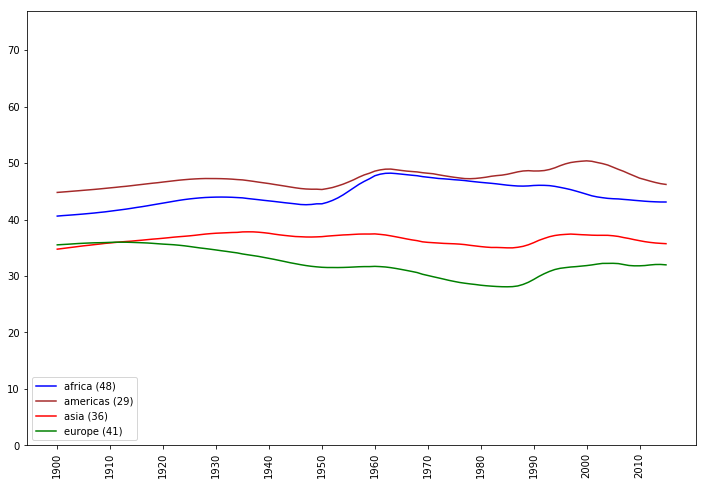

In [30]:
colors = {
    'asia': 'red',
    'europe': 'green',
    'africa': 'blue',
    'americas': 'brown'
}
gini_with_regions = our_gini.merge(countries.loc[:, "name":"six_regions"], left_on="country", right_on="name").set_index(our_gini.index)
for region, slice in gini_with_regions.groupby("four_regions"):
    m = slice.mean()
    sd = slice.std()
    plt.plot(
        slice.columns[:-4], 
        m, 
        c=colors[region], 
        label="{} ({})".format(region, slice.shape[0])
    )
#     plt.fill_between(
#         our_gini.columns,
#         m - sd,
#         m + sd,
#         color=colors[cl],
#         alpha=0.2
#     )
plt.ylim(0, our_gini.max().max())
plt.xticks(our_gini.columns[::10], rotation="vertical")
plt.legend(loc="lower left")